## LAB1: Gerações, representações e transformações de dados multivariados

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: 
## Número:

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab1.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.
# Ficheiros que não se encontrem em conformidade com o formato especificado não serão corrigidos!

<hr style="border:2px solid black"> </hr>

In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import scipy.linalg as la
rd.seed(42)

# Pergunta 1:
## a) Gere 5000 (cinco mil) pontos a duas dimensões, uniformemente distribuídos entre [-1,+3] na primeira dimensão, e entre [+2,+4]  na segunda dimensão. Os pontos gerados deverão estar numa matriz $X$ de $2\times5000$.
## b) Visualize os pontos gerados. Certifique-se que no gráfico, ambas as dimensões se encontram na mesma escala.

(-2.0, 5.0, -2.0, 5.0)

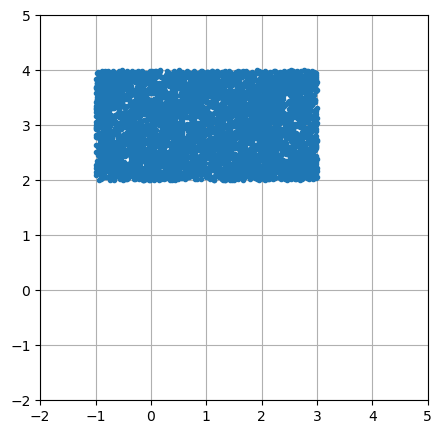

In [29]:
N = 5000
d1 = rd.rand(1, N)*4-1
d2 = rd.rand(1, N)*2+2

X = np.vstack((d1, d2))

plt.figure(figsize=(5,5))
plt.plot(X[0, :], X[1, :], '.')
plt.grid(True)
plt.axis([-2,5,-2,5])

# Pergunta 2:
## a) Através duma transformação matricial do tipo $X2=A\times X + b$ ($A$ matriz de $2\times2$, e $b$ vetor bi-dimensional), escale a primeira dimensão dos dados por um fator de 0.5, escale a segunda dimensão dos dados por um fator de 2, e faça uma translação dos dados de modo a estes terem média nula.
## b) Através duma transformação matricial do tipo $X3=B\times X2$ (B matriz de $2\times2$), faça uma rotação aos dados da matrix $X2$, de 30 graus no sentido contrário ao dos ponteiros do relógio.
## c) Visualize os pontos gerados (matriz $X3$), conjuntamento com os dados originiais (matriz $X$). Certifique-se que no gráfico, ambas as dimensões se encontram na mesma escala. 

[1.0182231  3.00046766]
Média:  [ 2.70006240e-17 -1.86162197e-16]


(-2.057695758736329, 3.2387819871355985, -2.512107873634627, 4.309213211347782)

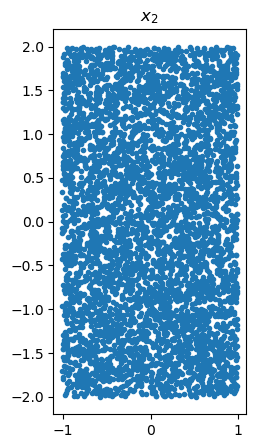

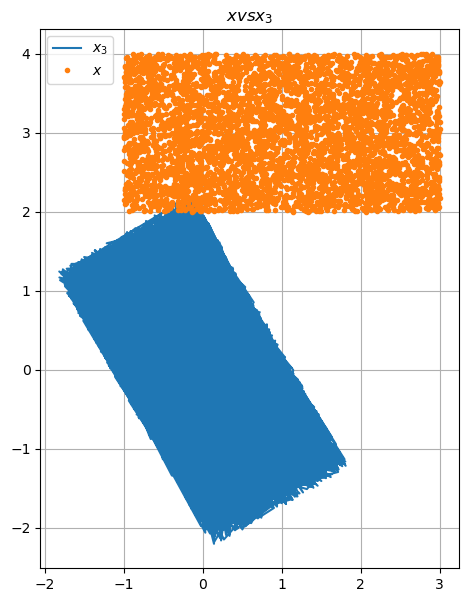

In [52]:
m = np.mean(X, axis=1)
print (m)
A = np.array([[0.5, 0],[0, 2]])

X2 = np.dot(A, X)
X2 = X2 - np.mean(X2, axis=1)[:, np.newaxis]
print("Média: ", np.mean(X2, axis=1))

plt.figure(figsize=(5,5))
plt.plot(X2[0, :], X2[1, :], '.')
plt.title('$x_2$')
plt.axis('scaled')


ang = np.pi/6

B = np.array([[np.cos(ang), -np.sin(ang)],
                [np.sin(ang), np.cos(ang)]])

X3 = np.dot(B, X2)

plt.figure(figsize=(7,7))
plt.plot(X3[0, :], X3[1, :], X[0, :], X[1, :] , '.')
plt.legend(['$x_3$', '$x$'])
plt.title('$x vs x_3$')
plt.grid(True)
plt.axis('scaled')




# Pergunta 3:

## Considere uma matriz $X4$ de $2\times10000$ obtida com a concatenação das matrizes $X$ e $X3$. Faça os histogramas de cada dimensão dos dados da matriz $X4$. Certifique-se que o número de intervalos é apropriado, e a sua largura também, para uma boa visualização dos mesmos.


Text(0.5, 1.0, '2ªdimensão de X4')

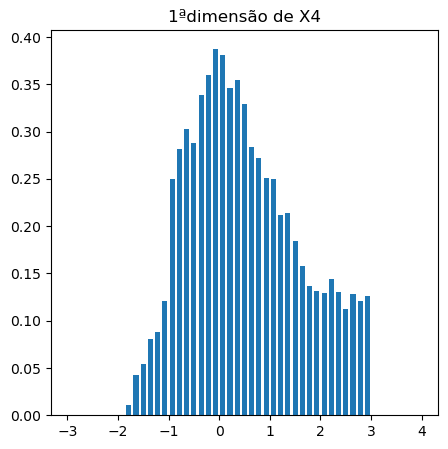

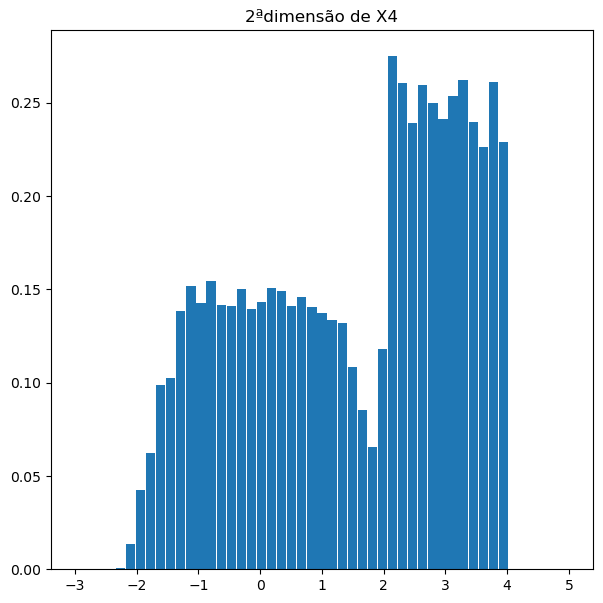

In [66]:
X4 = np.hstack((X, X3))

h1, b1 = np.histogram(X4[0, :], np.linspace(-3, 4, 50), density=True)
b1 = (b1[1:] + b1[:-1])/2

h2, b2 = np.histogram(X4[1, :], np.linspace(-3, 5, 50), density=True)
b2 = (b2[1:] + b2[:-1])/2

plt.figure(figsize=(5,5))
plt.bar(b1, h1, width = 0.1)
plt.title('1ªdimensão de X4')

plt.figure(figsize=(7,7))
plt.bar(b2, h2, width = 0.15)
plt.title('2ªdimensão de X4')
